In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import __future__

In [2]:
df=pd.read_csv('Student_Performance - Sheet1.csv')

In [3]:
df.head()

,S.No,HoursStudy,ScoreObtained
0,1,443,45
1,2,800,92
2,3,500,50
3,4,200,80
4,5,120,90


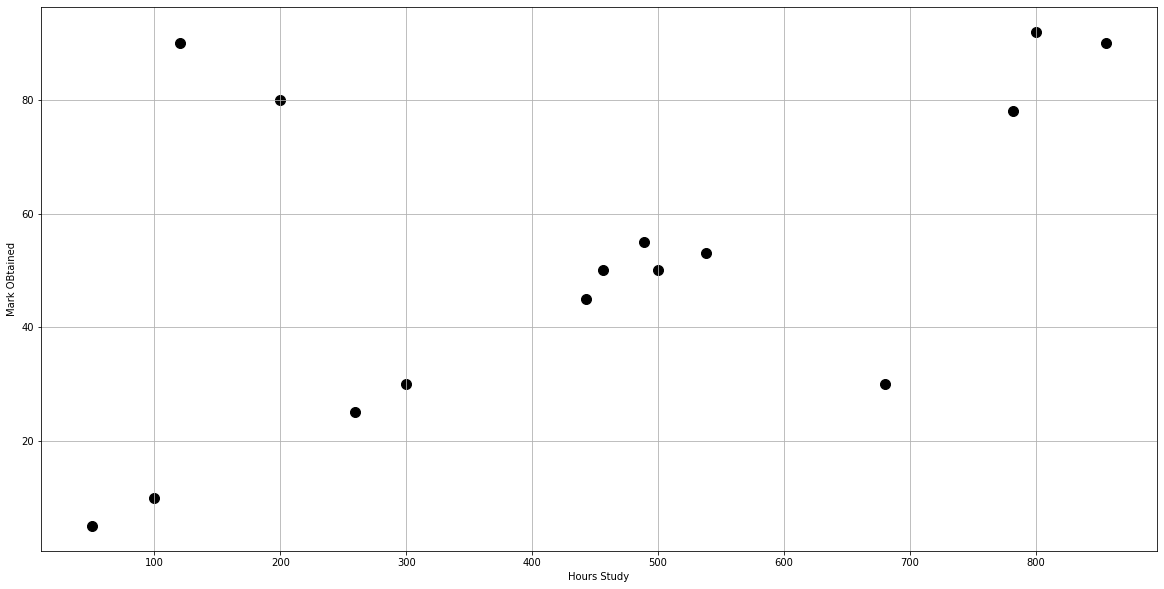

In [4]:
fig ,ax=plt.subplots(figsize=(20,10))
plt.scatter(df['HoursStudy '],df['ScoreObtained'],color='black',s=100)
ax.set(xlabel='Hours Study',ylabel='Mark OBtained')
ax.grid()
plt.show()

In [5]:
X=df.drop('S.No',axis=1)

In [6]:
X.head()

,HoursStudy,ScoreObtained
0,443,45
1,800,92
2,500,50
3,200,80
4,120,90


In [7]:
from sklearn.neighbors import LocalOutlierFactor

In [8]:
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.2)

In [9]:
X=df.drop(['S.No'],axis=1)

In [10]:
y_pred=lof.fit_predict(X)

/root/anaconda3/envs/cnn/lib/python3.8/site-packages/sklearn/neighbors/_lof.py:265: UserWarning: n_neighbors (20) is greater than the total number of samples (15). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


In [11]:
y_pred

array([-1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1])

### here inlier point tag as 1 and outlier point tag as -1

In [12]:
# to check how many outliers are exit
n_outliers=(y_pred==-1).sum()

In [13]:
n_outliers

3

In [14]:
X_score=lof.negative_outlier_factor_

In [15]:
# inlier have score close to -1 and outlier far away from -1 

X_score

array([-1.02534075, -0.98324251, -1.02077866, -0.99550968, -0.98560155,
       -1.02620335, -0.97636957, -1.02206871, -0.98259887, -0.97636957,
       -1.00751592, -1.00239596, -0.99868087, -0.98564729, -1.0160541 ])

# Outlier Analysis Using Isolation forest

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
isf=IsolationForest(behaviour='new',contamination=0.19)

In [18]:
y_pred=isf.fit_predict(X)

/root/anaconda3/envs/cnn/lib/python3.8/site-packages/sklearn/ensemble/_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


In [19]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1])

In [20]:
n_outliers=(y_pred==-1).sum()

In [21]:
n_outliers

3

In [22]:
df.describe()

,S.No,HoursStudy,ScoreObtained
count,15.000000,15.000000,15.000000
mean,8.000000,438.200000,52.200000
std,4.472136,263.642398,28.889444
min,1.000000,50.000000,5.000000
25%,4.500000,229.500000,30.000000
50%,8.000000,456.000000,50.000000
75%,11.500000,609.000000,79.000000
max,15.000000,856.000000,92.000000


In [28]:
xx,yy=np.meshgrid(np.linspace(0,1010,500),
                 np.linspace(0,102,500))
print('xx=',xx.ravel())
print('yy=',yy.ravel())

xx= [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy= [  0.   0.   0. ... 102. 102. 102.]


In [29]:
np.c_[xx.ravel(),yy.ravel()]

array([[   0.        ,    0.        ],
       [   2.0240481 ,    0.        ],
       [   4.04809619,    0.        ],
       ...,
       [1005.95190381,  102.        ],
       [1007.9759519 ,  102.        ],
       [1010.        ,  102.        ]])

In [30]:
z=isf.predict(np.c_[xx.ravel(),yy.ravel()])

In [31]:
z=z.reshape(xx.shape)
z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

<ipython-input-32-72691eefbd39>:5: UserWarning: No contour levels were found within the data range.
  plt.contour(xx,yy,levels=[0],linewidth=2,cmap='Blues_r')
<ipython-input-32-72691eefbd39>:5: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,levels=[0],linewidth=2,cmap='Blues_r')


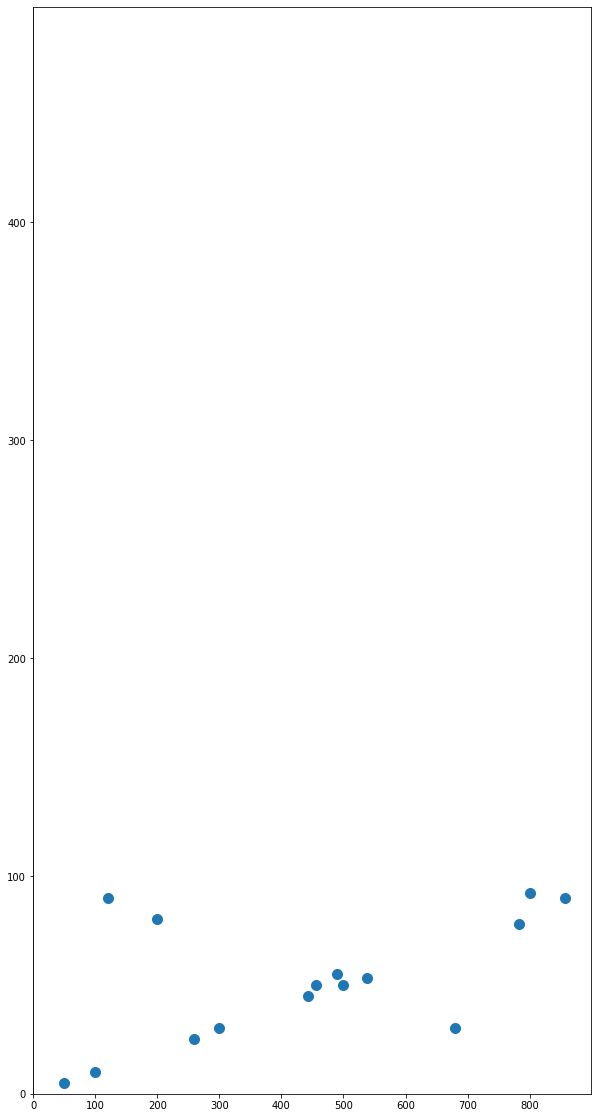

In [32]:
plt.figure(figsize=(10,20))
plt.scatter(df['HoursStudy '],df['ScoreObtained'],
           s=100,
           cmap=[(y_pred+1)//2])
plt.contour(xx,yy,levels=[0],linewidth=2,cmap='Blues_r')

# Outlier Analysis Using EllipticEnveloped

In [35]:
from sklearn.covariance import EllipticEnvelope

In [36]:
ee=EllipticEnvelope(support_fraction=1.,contamination=0.19)

In [37]:
y_pred=ee.fit_predict(X)

In [38]:
y_pred

array([ 1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [39]:
n_outliers=(y_pred==-1).sum()

In [40]:
n_outliers


3

In [42]:
xx,yy=np.meshgrid(np.linspace(0,1010,500),
                 np.linspace(-5,120,500))
Z=ee.predict(np.c_[xx.ravel(),yy.ravel()])
print('xx=',xx.ravel())
print('yy=',yy.ravel())

xx= [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy= [ -5.  -5.  -5. ... 120. 120. 120.]


<ipython-input-43-72691eefbd39>:5: UserWarning: No contour levels were found within the data range.
  plt.contour(xx,yy,levels=[0],linewidth=2,cmap='Blues_r')
<ipython-input-43-72691eefbd39>:5: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,levels=[0],linewidth=2,cmap='Blues_r')


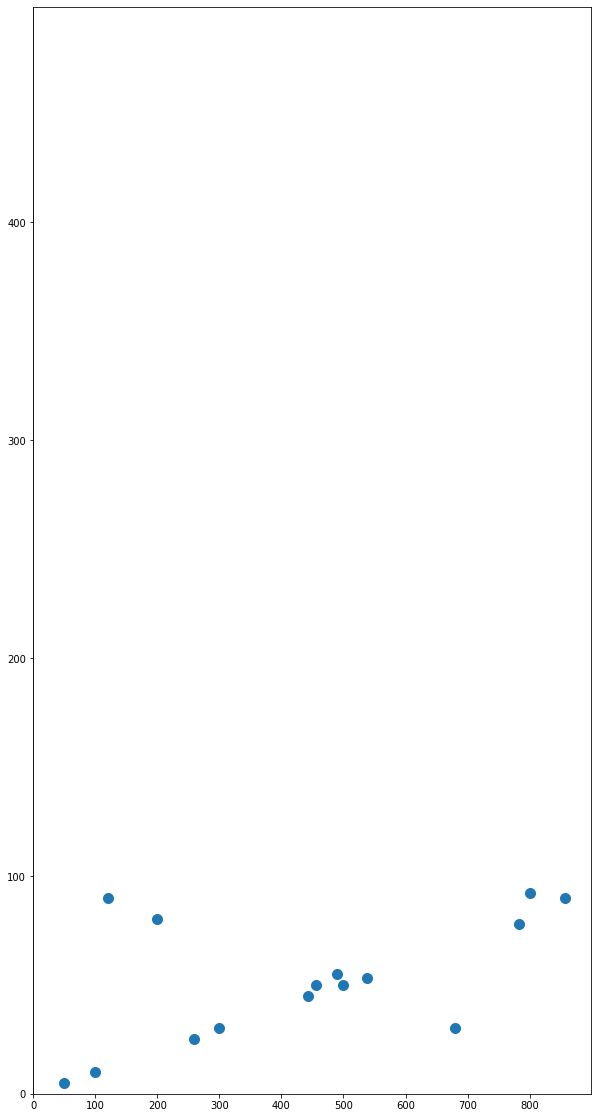

In [43]:
plt.figure(figsize=(10,20))
plt.scatter(df['HoursStudy '],df['ScoreObtained'],
           s=100,
           cmap=[(y_pred+1)//2])
plt.contour(xx,yy,levels=[0],linewidth=2,cmap='Blues_r')